In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
games = pd.read_csv('vgsales.csv', sep=',')

In [4]:
games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [19]:
games['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [22]:
games['Publisher'].value_counts()

Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Warp                               1
New                                1
Elite                              1
Evolution Games                    1
UIG Entertainment                  1
Name: Publisher, Length: 578, dtype: int64

Columns chosen to study the correlation: Platform vs Publisher.

Prediction: There could be a correlation because a publisher can have their specialty focussed/trained on one particular platform where they post most of their games. 
    

In [15]:
# penguinsContingencyTable = 
create_contingency_table(games, 'Platform','Publisher')

Platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
Publisher,,,,,,,,,,,,,,,,,,,,,
10TACLE Studios,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1C Company,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20th Century Fox Video Games,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2D Boy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3DO,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
id Software,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
imageepoch Inc.,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
inXile Entertainment,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:xlabel='Publisher'>

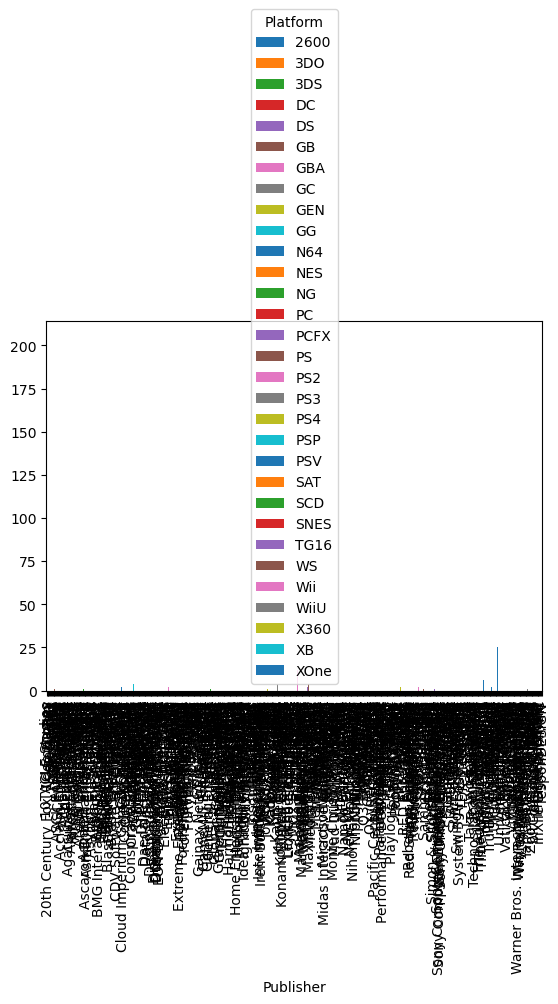

In [10]:
penguinsContingencyTable.plot(kind='bar')

In [16]:
def create_contingency_table(dataset, column1, column2):
    return dataset.groupby([column1, column2]).size().unstack(column1, fill_value=0)

In [17]:
from scipy.stats import chi2_contingency
def check_cat_vs_cat_correlation(dataset, column1, column2):
    contingency_table = create_contingency_table(dataset, column1, column2)
    chi2 = chi2_contingency(contingency_table)
    p_value = chi2[1]
    odds_of_correlation = 1 - p_value
    print(f"The odds of a correlation between {column1} and {column2} is {odds_of_correlation * 100}% (Based on a p value of {p_value}).")
    print("This percentage needs to be at least 95% for a significant correlation.")

In [18]:
check_cat_vs_cat_correlation(games, 'Platform','Publisher')

The odds of a correlation between Platform and Publisher is 100.0% (Based on a p value of 0.0).
This percentage needs to be at least 95% for a significant correlation.


The result show that there is an clear correlation between platform and publisher. The correlation is 100% based on this formula.


In [30]:
games['Publisher'].value_counts()

Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Warp                               1
New                                1
Elite                              1
Evolution Games                    1
UIG Entertainment                  1
Name: Publisher, Length: 578, dtype: int64

In [43]:
top10 = games['Publisher'].value_counts().sort_values(ascending=False).index[:10]

In [44]:
notInTop10 = ~games['Publisher'].isin(top10)

In [45]:
games.loc[notInTop10, 'Publisher'] = 'Other'

In [46]:
games['Publisher'].value_counts()

Other                           8847
Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
THQ                              715
Nintendo                         703
Sony Computer Entertainment      683
Sega                             639
Name: Publisher, dtype: int64

Redo with new code:

In [47]:
penguinsContingencyTable = create_contingency_table(games, 'Platform','Publisher')

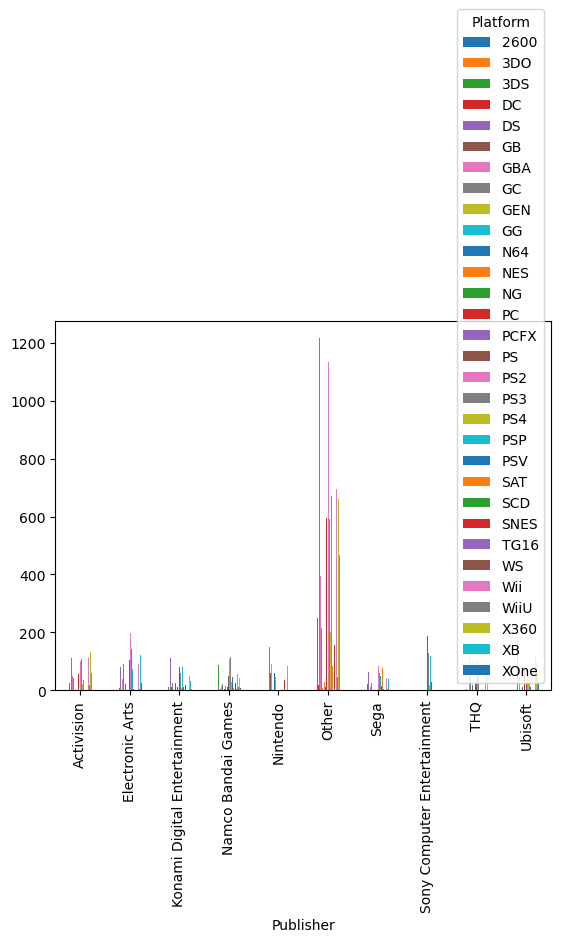

In [48]:
penguinsContingencyTable = penguinsContingencyTable.plot(kind='bar')